# Lecture 07의 데모

### Lecture 07의 데모에 대한 코드

참고자료: 

https://github.com/data-8/materials-sp22/blob/main/lec/lec09.ipynb

https://github.com/data-8/materials-sp22/blob/main/lec/lec10.ipynb

In [2]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/lec

Mounted at /content/gdrive
/content/gdrive/MyDrive/ITEC419-fa22/lec


In [3]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Histogram Example

In [4]:
# From https://womenintheworld.org/highest-paid-actress/
incomes = Table.read_table('2022_female_actors.csv')
incomes.show(3)

Name,Income (millions)
Scarlett Johansson,56
Sofia Vergara,43
Angelina Jolie,35.5


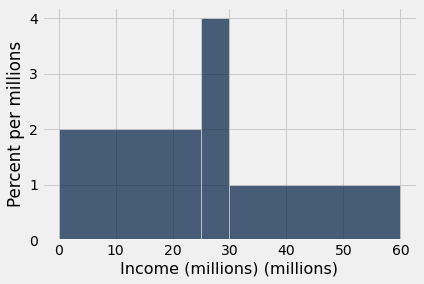

In [6]:
my_bins = make_array(0, 25, 30, 60)
incomes.hist('Income (millions)', bins=my_bins, unit='millions')
#25-30 사이 구간이 가장 높이가 높은 이
# 전세계 배우들 중 가장 많이 버는 20명만 뽑았는데 구간을 0-25로 해둬서 그 사이에 들어가야하는 값이 없는데 억지로 채워둔 것
# 면적은 정해져있는데 

In [8]:
incomes.column('Income (millions)')

array([ 56. ,  43. ,  35.5,  35. ,  31.5,  30. ,  28. ,  28. ,  25. ,
        25. ,  24. ,  23.5,  23. ,  22.5,  22. ,  19. ,  16. ,  16. ,
        15.5,  12.5])

In [7]:
incomes.column(1).min()
# top20 중 가장 작은 값이 12.5
# -> my_bin을 잘못 만든 것!

12.5

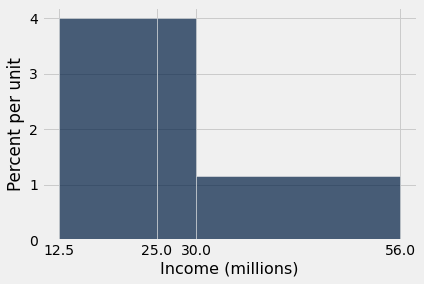

In [9]:
my_bins=make_array(incomes.column(1).min(), 25,30,incomes.column(1).max())
incomes.hist('Income (millions)', bins=my_bins)
plots.xticks(my_bins); #원래 출력되는 값들을 출력되지 않게 하기 윟 ㅐ ; 넣음

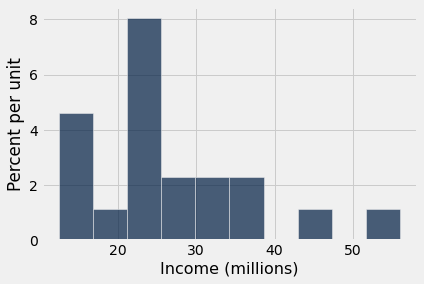

In [ ]:
incomes.hist('Income (millions)')

## Defining Functions

Example: Create a function that takes a numerical input and triples it: triple($x$) = $3 x$

In [13]:
def triple(x):
    return 3 * x

In [ ]:
triple(3)

9

밑에 x 쓰더라도 그게 뭔지 모름

아래 x는 위 함수의 인자로 사용되더라도, 함수가 호출되어 인자 x에 3이 배정되더라도 여전히 undefined name이다.

In [ ]:
triple(4)

12

In [ ]:
y=7
triple(y)

21

In [ ]:
triple(2+y)

27

## The Anatomy of a Function

In [12]:
def function_name(arguments):
    ...
    return return_expression

## Functions are Type-Agnostic

In [14]:
triple('ha ')

'ha ha ha '

In [ ]:
'ha'*3

'hahaha'

In [ ]:
nums=make_array(3,4,5,6)
triple(nums)

array([ 9, 12, 15, 18])

## Discussion

In [15]:
# s is an array of numbers
# this returns the percent of the total for each element
# 함수명 확실히 적기
# 1. 주석으로 함수 근처에 설명 적거나
def percent_of_total(s):
    return np.round(s / sum(s) * 100, 2)

# 2. 함수 안에 문장 주석("""") 만들어서 적거나
# def percent_of_total(s):
#   """
#   어떤 기능을 가진 함수이다

#   """
#     return np.round(s / sum(s) * 100, 2)

In [16]:
percent_of_total(make_array(2,4,6,8))

array([ 10.,  20.,  30.,  40.])

In [ ]:
percent_of_total(make_array(2,4,6,8))

array([ 10.,  20.,  30.,  40.])

## Functions Can Take Multiple Arguments

Example: Calculate the Hypotenuse Length of a Right Triangle

Pythagoras's Theorem: If $x$ and $y$ denote the lengths of the right-angle sides, then the hypotenuse length $h$ satisfies:

$h^2$ = $x^2$ + $y^2$ which implies $h = \sqrt{x^2 + y^2}$

In [17]:
def hypotenuse(x, y):
    hypot_squared = (x ** 2 + y ** 2)
    hypot = hypot_squared ** 0.5
    return hypot

In [18]:
hypotenuse(9,12)

15.0

In [19]:
hypotenuse(3,4)

5.0

We could've typed the body all in one line. Do you find this more readable or less readable than the original version?

In [20]:
def hypotenuse(x, y):
    return (x ** 2 + y ** 2) ** 0.5

In [21]:
hypotenuse(9, 12)

15.0

## **Example: A function that takes the year of birth of a person and produces their age in years.**

In [22]:
def age(year):
    age = 2022 - year
    return age
# 영화가 만들어진지 얼마나 오래됐는지 리턴하는 함수

In [ ]:
age(1942)

80

Now add some bells and whistles: Take person's name and year of birth (two arguments). Produce a sentence that states how old they are.

In [23]:
def name_and_age(name, year):
    return name + ' is ' + str(age(year)) + ' years old.'

In [24]:
name_and_age('Joe',1942)

'Joe is 80 years old.'

## **Apply**

In [25]:
ages = Table().with_columns(
    'Person', make_array('Jim', 'Pam', 'Michael', 'Creed'),
    'Birth Year', make_array(1985, 1988, 1967, 1904)
)
ages

Person,Birth Year
Jim,1985
Pam,1988
Michael,1967
Creed,1904


In [26]:
ages.apply(name_and_age,'Person','Birth Year')#결과 가 배열로 나옴 이 배열을 어딘가에 집어넣으면 됨

array(['Jim is 37 years old.', 'Pam is 34 years old.',
       'Michael is 55 years old.', 'Creed is 118 years old.'],
      dtype='<U24')

In [27]:
ages=ages.with_column('Age',ages.apply(age,'Birth Year'))
ages

Person,Birth Year,Age
Jim,1985,37
Pam,1988,34
Michael,1967,55
Creed,1904,118


## Prediction

In [28]:
families = Table.read_table('family_heights.csv')
families

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


In [29]:
parent_avgs=(families.column('father')+families.column('mother'))/2
parent_avgs

array([ 72.75,  72.75,  72.75,  72.75,  71.  ,  71.  ,  71.  ,  71.  ,
        69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  66.75,
        66.75,  66.75,  66.75,  66.75,  66.75,  71.  ,  71.  ,  71.  ,
        71.  ,  71.  ,  71.  ,  71.  ,  70.25,  70.25,  70.25,  70.25,
        69.75,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,
        68.  ,  67.5 ,  70.  ,  70.  ,  70.  ,  70.  ,  69.75,  69.75,
        69.75,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,
        69.  ,  69.  ,  68.75,  68.75,  68.75,  68.75,  68.75,  68.75,
        68.5 ,  68.5 ,  68.5 ,  68.1 ,  70.85,  70.85,  70.85,  70.85,
        70.85,  70.85,  70.85,  70.85,  70.  ,  70.  ,  70.  ,  69.5 ,
        69.5 ,  69.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,
        68.5 ,  68.75,  68.  ,  68.  ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,
        67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,
        67.5 ,  67.5 ,  68.  ,  68.  ,  68.  ,  67.  ,  67.25,  67.25,
      

In [30]:
def inches2cm(inches): #inches에 값이 하나씩 들어와도, 배열로 들어와도 됨
  return np.round(inches * 2.54,1 )
  # 소숫점 한자리에서 끊어서 올림

In [31]:
inches2cm(parent_avgs)

array([ 184.8,  184.8,  184.8,  184.8,  180.3,  180.3,  180.3,  180.3,
        176.5,  176.5,  176.5,  176.5,  176.5,  176.5,  176.5,  169.5,
        169.5,  169.5,  169.5,  169.5,  169.5,  180.3,  180.3,  180.3,
        180.3,  180.3,  180.3,  180.3,  178.4,  178.4,  178.4,  178.4,
        177.2,  172.7,  172.7,  172.7,  172.7,  172.7,  172.7,  172.7,
        172.7,  171.4,  177.8,  177.8,  177.8,  177.8,  177.2,  177.2,
        177.2,  175.3,  175.3,  175.3,  175.3,  175.3,  175.3,  175.3,
        175.3,  175.3,  174.6,  174.6,  174.6,  174.6,  174.6,  174.6,
        174. ,  174. ,  174. ,  173. ,  180. ,  180. ,  180. ,  180. ,
        180. ,  180. ,  180. ,  180. ,  177.8,  177.8,  177.8,  176.5,
        176.5,  176.5,  174. ,  174. ,  174. ,  174. ,  174. ,  174. ,
        174. ,  174.6,  172.7,  172.7,  171.4,  171.4,  171.4,  171.4,
        171.4,  171.4,  171.4,  171.4,  171.4,  171.4,  171.4,  171.4,
        171.4,  171.4,  172.7,  172.7,  172.7,  170.2,  170.8,  170.8,
      

In [32]:
families.apply(inches2cm,'father')

array([ 199.4,  199.4,  199.4,  199.4,  191.8,  191.8,  191.8,  191.8,
        190.5,  190.5,  190.5,  190.5,  190.5,  190.5,  190.5,  190.5,
        190.5,  190.5,  190.5,  190.5,  190.5,  188. ,  188. ,  188. ,
        188. ,  188. ,  188. ,  188. ,  188. ,  188. ,  188. ,  189.2,
        188. ,  188. ,  188. ,  188. ,  188. ,  188. ,  188. ,  188. ,
        188. ,  188. ,  185.4,  185.4,  185.4,  185.4,  185.4,  185.4,
        185.4,  185.4,  185.4,  185.4,  185.4,  185.4,  185.4,  185.4,
        185.4,  185.4,  185.4,  185.4,  185.4,  185.4,  185.4,  185.4,
        185.4,  185.4,  185.4,  185.9,  184.7,  184.7,  184.7,  184.7,
        184.7,  184.7,  184.7,  184.7,  182.9,  182.9,  182.9,  182.9,
        182.9,  182.9,  182.9,  182.9,  182.9,  182.9,  182.9,  182.9,
        182.9,  182.9,  182.9,  182.9,  182.9,  182.9,  182.9,  182.9,
        182.9,  182.9,  182.9,  182.9,  182.9,  182.9,  182.9,  182.9,
        182.9,  182.9,  184.2,  184.2,  184.2,  182.9,  184.2,  184.2,
      

In [37]:
heights = Table().with_columns(
    'Parent Average', inches2cm(parent_avgs),
    'Child', inches2cm(families.column('child')),
    'Sex', families.column('sex')
)
heights

Parent Average,Child,Sex
184.8,185.9,male
184.8,175.8,female
184.8,175.3,female
184.8,175.3,female
180.3,186.7,male
180.3,184.2,male
180.3,166.4,female
180.3,166.4,female
176.5,180.3,male
176.5,172.7,female


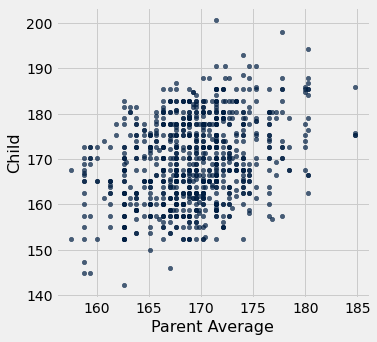

In [38]:
heights.scatter('Parent Average', 'Child') 
#parent average가 클수록 child가 크다는 관계가 있음
#linear association -> 경향성을 가진다
#수치 데이터 관련 표라면 정확하게 특정한 값에 해당되는 데이터를 찾으려고 하는 것은 아님 (카테고리별로 나눈 데이터라면 값에 해당하는 것 찾기)

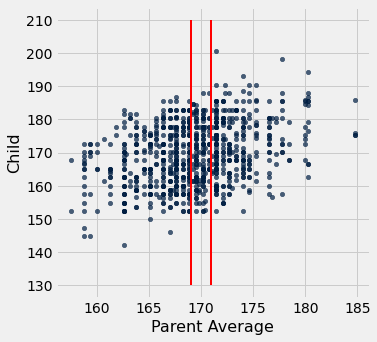

In [39]:
heights.scatter('Parent Average', 'Child')
plots.plot([169, 169], [130, 210], color='red', lw=2)
plots.plot([171, 171], [130, 210], color='red', lw=2);

In [40]:
nearby=heights.where('Parent Average',are.between(170-1, 170+1))
nearby

Parent Average,Child,Sex
169.5,182.9,male
169.5,175.3,male
169.5,172.7,male
169.5,168.9,female
169.5,158.8,female
169.5,158.8,female
170.2,162.6,female
170.8,180.3,male
170.8,177.8,male
170.8,177.8,male


In [41]:
nearby_mean = np.mean(nearby.column('Child'))
nearby_mean

169.76774193548388

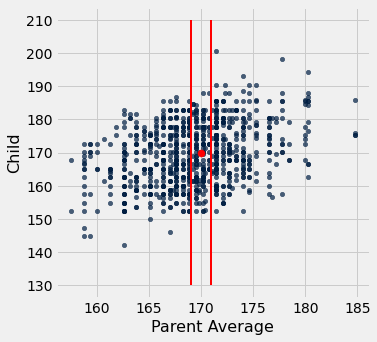

In [42]:
heights.scatter('Parent Average', 'Child')
plots.plot([169, 169], [130, 210], color='red', lw=2)
plots.plot([171, 171], [130, 210], color='red', lw=2)
plots.scatter(170, nearby_mean, color='red', s=50);

In [43]:
def predict(parent_avg):
    nearby = heights.where('Parent Average',
                           are.between(parent_avg-1,parent_avg+1))
    nearby_mean = np.mean(nearby.column('Child'))
    return nearby_mean

In [44]:
predict(170)

169.76774193548388

In [45]:
predict(165)

167.76874999999998

In [46]:
predicted_heights = heights.apply(predict, 'Parent Average')
predicted_heights #이 부모 밑에서 자란 아이는 키가 이정도 된다

array([ 178.075     ,  178.075     ,  178.075     ,  178.075     ,
        178.86315789,  178.86315789,  178.86315789,  178.86315789,
        172.67692308,  172.67692308,  172.67692308,  172.67692308,
        172.67692308,  172.67692308,  172.67692308,  169.292     ,
        169.292     ,  169.292     ,  169.292     ,  169.292     ,
        169.292     ,  178.86315789,  178.86315789,  178.86315789,
        178.86315789,  178.86315789,  178.86315789,  178.86315789,
        176.525     ,  176.525     ,  176.525     ,  176.525     ,
        174.39473684,  172.07555556,  172.07555556,  172.07555556,
        172.07555556,  172.07555556,  172.07555556,  172.07555556,
        172.07555556,  171.64578313,  175.3       ,  175.3       ,
        175.3       ,  175.3       ,  174.39473684,  174.39473684,
        174.39473684,  173.6483871 ,  173.6483871 ,  173.6483871 ,
        173.6483871 ,  173.6483871 ,  173.6483871 ,  173.6483871 ,
        173.6483871 ,  173.6483871 ,  172.6880597 ,  172.68805

In [47]:
heights = heights.with_column('Prediction',predicted_heights)
heights

Parent Average,Child,Sex,Prediction
184.8,185.9,male,178.075
184.8,175.8,female,178.075
184.8,175.3,female,178.075
184.8,175.3,female,178.075
180.3,186.7,male,178.863
180.3,184.2,male,178.863
180.3,166.4,female,178.863
180.3,166.4,female,178.863
176.5,180.3,male,172.677
176.5,172.7,female,172.677


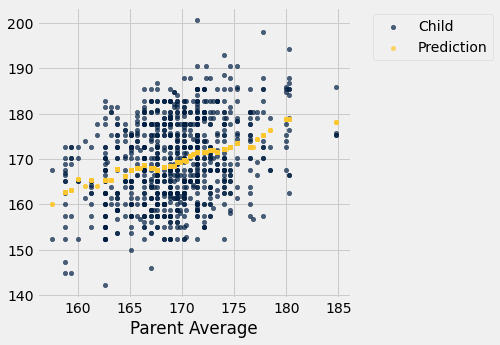

In [48]:
heights.select('Parent Average', 'Child', 'Prediction').scatter(0)

## Prediction Accuracy

In [49]:
def difference(x,y):
  return x-y

In [50]:
heights.apply(difference,'Prediction','Child')

array([ -7.82500000e+00,   2.27500000e+00,   2.77500000e+00,
         2.77500000e+00,  -7.83684211e+00,  -5.33684211e+00,
         1.24631579e+01,   1.24631579e+01,  -7.62307692e+00,
        -2.30769231e-02,  -6.42307692e+00,  -1.32307692e+00,
         2.47692308e+00,   8.87692308e+00,   1.26769231e+01,
        -1.36080000e+01,  -6.00800000e+00,  -3.40800000e+00,
         3.92000000e-01,   1.04920000e+01,   1.04920000e+01,
         2.36315789e+00,  -1.54368421e+01,  -9.13684211e+00,
        -6.53684211e+00,  -6.53684211e+00,  -2.36842105e-01,
         1.62631579e+01,  -2.57500000e+00,   3.82500000e+00,
         8.92500000e+00,   8.92500000e+00,   7.99473684e+00,
        -1.59244444e+01,  -5.72444444e+00,  -6.24444444e-01,
         1.87555556e+00,   1.87555556e+00,   4.47555556e+00,
         1.07755556e+01,   1.20755556e+01,   6.54578313e+00,
        -5.00000000e+00,   1.78000000e+01,   2.60000000e+00,
         5.10000000e+00,  -5.90526316e+00,  -4.70526316e+00,
         4.99473684e+00,

In [51]:
pred_errs = heights.apply(difference,'Prediction', 'Child')
heights = heights.with_column('Errors', pred_errs)
heights.show(3)

Parent Average,Child,Sex,Prediction,Errors
184.8,185.9,male,178.075,-7.825
184.8,175.8,female,178.075,2.275
184.8,175.3,female,178.075,2.775


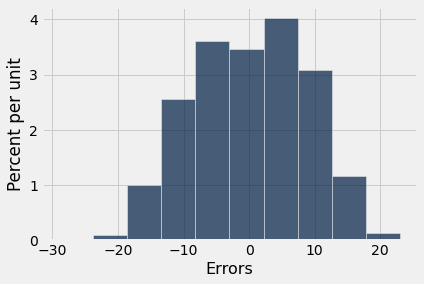

In [53]:
heights.hist('Errors')
#pred된 값보다 실제 데이터가 더 크면 마이너스
# 플러스: 실제보다 구간에 포함된 부분이 많이 높게 찾아짐

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


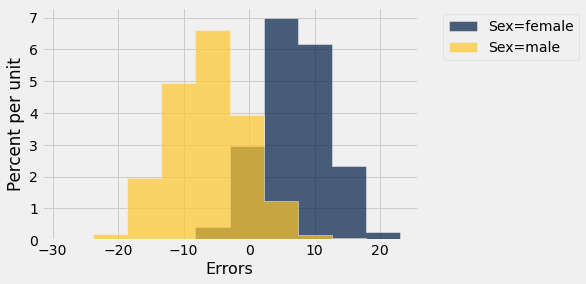

In [52]:
heights.hist('Errors',group='Sex')# 이걸 보고 남녀의 구분을 뚜렷하게 보고 계산을 한다.
#prediction 할ㄱ때 자녀의ㅡ 성별을 고려해서 해야 함 

## Discussion Question

In [55]:
def predict_smarter(parent_avg,s):
    nearby = heights.where('Parent Average',
                           are.between(parent_avg-1,parent_avg+1))
    nearby_same_sex=nearby.where('Sex',s)#성별이 S인 것만 뽑아서 -> 같은 성별의 사람들만 뽑아서 평균을 내자
    nearby_mean = np.mean(nearby_same_sex.column('Child'))
    return nearby_mean# 같은 성별에 있는 사람만 평균을 내자

In [56]:
predict_smarter(170,'female')

162.58333333333334

In [57]:
predict_smarter(170,'male')

176.0

In [58]:
predict(170)

169.76774193548388

In [59]:
smarter_predictions = heights.apply(predict_smarter, 
                                    'Parent Average',
                                    'Sex')
heights = heights.with_column('Smarter Preds',smarter_predictions) #성별을 고려한 pred
heights

Parent Average,Child,Sex,Prediction,Errors,Smarter Preds
184.8,185.9,male,178.075,-7.825,185.9
184.8,175.8,female,178.075,2.275,175.467
184.8,175.3,female,178.075,2.775,175.467
184.8,175.3,female,178.075,2.775,175.467
180.3,186.7,male,178.863,-7.83684,186.667
180.3,184.2,male,178.863,-5.33684,186.667
180.3,166.4,female,178.863,12.4632,171.84
180.3,166.4,female,178.863,12.4632,171.84
176.5,180.3,male,172.677,-7.62308,178.808
176.5,172.7,female,172.677,-0.0230769,166.546


In [60]:
smart_errs = heights.apply(difference, 'Smarter Preds', 'Child')
heights = heights.with_column('Smarter Errors', smart_errs)
heights

Parent Average,Child,Sex,Prediction,Errors,Smarter Preds,Smarter Errors
184.8,185.9,male,178.075,-7.825,185.9,0
184.8,175.8,female,178.075,2.275,175.467,-0.333333
184.8,175.3,female,178.075,2.775,175.467,0.166667
184.8,175.3,female,178.075,2.775,175.467,0.166667
180.3,186.7,male,178.863,-7.83684,186.667,-0.0333333
180.3,184.2,male,178.863,-5.33684,186.667,2.46667
180.3,166.4,female,178.863,12.4632,171.84,5.44
180.3,166.4,female,178.863,12.4632,171.84,5.44
176.5,180.3,male,172.677,-7.62308,178.808,-1.49231
176.5,172.7,female,172.677,-0.0230769,166.546,-6.15385


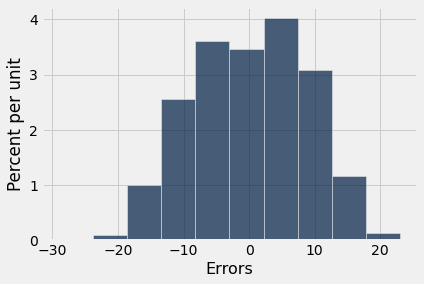

In [61]:
heights.hist('Errors')

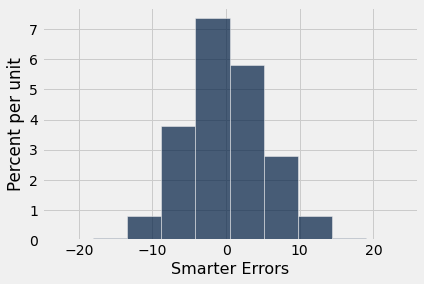

In [62]:
heights.hist('Smarter Errors') #성별을 고려했기 때문에 더 모여있음 (위에께 더 퍼져있음)